In [50]:
# load library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [13]:
# load gfs forecast
path = '/work/lilu/CLFS/outputs/'
gfs = np.load(path + 'gfs_0p25_f10_swvl1_2018.npy')
print("gfs forecast shape is {}".format(gfs.shape))
lat_gfs = np.arange(90, -90.1, -0.25)
lon_gfs = np.arange(0, 359.8, 0.25)
print("lat shape is {} and lon shape is {}".format(lat_gfs.shape, lon_gfs.shape))

gfs forecast shape is (365, 10, 721, 1440)
lat shape is (721,) and lon shape is (1440,)


In [18]:
# load smap observation
smap_obs = np.load(path + 'SMAP-L4_swvl1_2018.npy')
print("smap observation shape is {}".format(smap_obs.shape))

f = nc.Dataset(path + 'SMAP_L4_SSM_20150531.nc')
lat_smap = np.array(f['latitude'][:])
lon_smap = np.array(f['longitude'][:])
print("lat shape is {} and lon shape is {}".format(lat_smap.shape, lon_smap.shape))

smap observation shape is (365, 448, 672)
lat shape is (448,) and lon shape is (672,)


In [23]:
# load agme observation
AGME_obs = np.load(path + 'AGME_swvl1_2018.npy')
print("amge observation shape is {}".format(AGME_obs.shape))
AGME_auxiliary = np.load(path + 'AGME_auxiliary.npy')
lat_agme = AGME_auxiliary[:,0]
lon_agme = AGME_auxiliary[:,1]

amge observation shape is (365, 1674)


In [40]:
# plot

rmse_gfs, rmse_smap = [], []
r_gfs, r_smap = [], []


for i in range(len(lat_agme)):
    lat_obs = lat_agme[i]
    lon_obs = lon_agme[i]
    
    index_lat = np.argmin(np.abs(lat_gfs-lat_obs))
    index_lon = np.argmin(np.abs(lon_gfs-lon_obs))
    
    try:
        rmse_gfs.append(np.sqrt(mean_squared_error(AGME_obs[1:, i], gfs[:-1, 0, index_lat, index_lon])))
        r_gfs.append(np.corrcoef(AGME_obs[1:, i], gfs[:-1, 0, index_lat, index_lon])[0, 1])
    except:
        rmse_gfs.append(np.nan)
        r_gfs.append(np.nan)
        
    index_lat = np.argmin(np.abs(lat_smap-lat_obs))
    index_lon = np.argmin(np.abs(lon_smap-lon_obs))
    
    try:
        rmse_smap.append(np.sqrt(mean_squared_error(AGME_obs[:, i], smap_obs[:, index_lat, index_lon])))
        r_smap.append(np.corrcoef(AGME_obs[:, i], smap_obs[:, index_lat, index_lon])[0, 1])
    except:
        rmse_smap.append(np.nan)  
        r_smap.append(np.nan)

/root/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/root/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/root/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/root/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/root/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/root/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/root/anaconda3/lib/python3.7/site-packages/numpy/lib/func

In [73]:
r_smap = np.array(r_smap)
r_gfs = np.array(r_gfs)

r_smap[r_smap<0] = 0
r_gfs[r_gfs<0] = 0

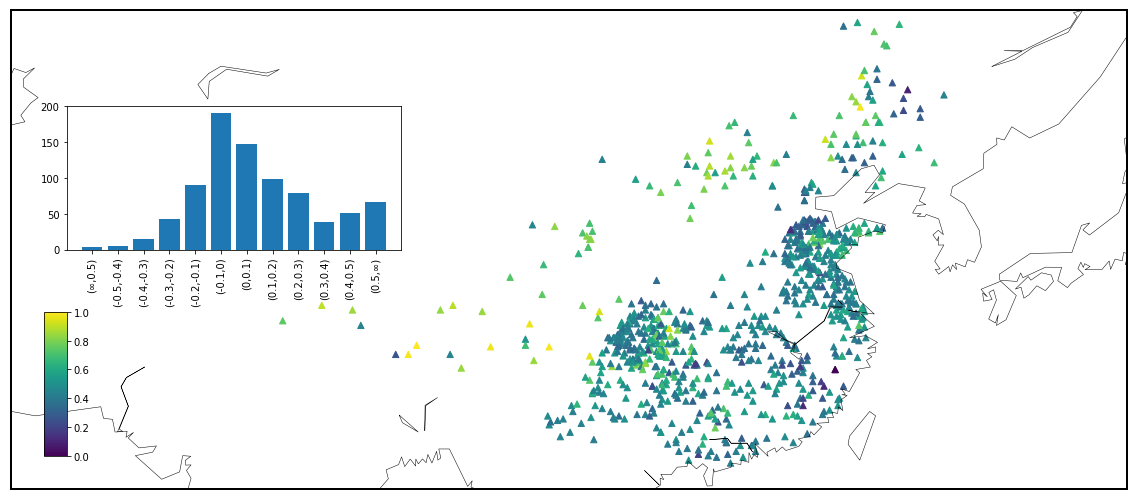

In [116]:
plt.figure(figsize=(20,20))

#
ax = plt.subplot(111)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

#--------------------------------------------------------------
m = Basemap(projection='mill',
            llcrnrlat=20, urcrnrlat=50,
            llcrnrlon=60, urcrnrlon=140,
            ax=ax)  # mill projection
m.drawcoastlines(linewidth=0.5)
x, y = m(lon_agme,lat_agme)
sc = m.scatter(x, y, c=np.array(r_smap)-np.array(r_gfs), marker='^',s=40)

#---------------------------------------------------------------
axin2 = ax.inset_axes([0.03, 0.07, 0.02, 0.3])

# colorbar
cbar = plt.colorbar(sc1, cax=axin2,)

# text colorbar
#axin2.text(-160, 750, 'The length of train dataset',
#           color='black', fontsize=15)

b = [4, 5, 14, 43, 90, 191, 147, 98, 79, 39, 51, 66]
axin3 = ax.inset_axes([0.05, 0.5, 0.3, 0.3])
cbar = axin3.bar(range(12), b)
axin3.set_xticks(np.arange(12))
axin3.set_xticklabels(['(∞,0.5)', '(-0.5,-0.4)','(-0.4,-0.3)', '(-0.3,-0.2)', '(-0.2,-0.1)',
                                       '(-0.1,0)','(0,0.1)','(0.1,0.2)','(0.2,0.3)','(0.3,0.4)','(0.4,0.5)','(0.5,∞)'], rotation=90)


plt.savefig('figure1.pdf')

In [76]:
a = np.array(r_smap)-np.array(r_gfs)
len(a[a>0])

480

In [79]:
len(a[a>0.5])

66

In [90]:
len(a[(a>0.4) & (a<0.5)])

51

In [91]:
len(a[(a>0.3) & (a<0.4)])

39

In [92]:
len(a[(a>0.2) & (a<0.3)])

79

In [93]:
len(a[(a>0.1) & (a<0.2)])

98

In [83]:
len(a[(a<0.1) & (a>0)])

147

In [84]:
len(a[(a<0) & (a>-0.1)])

191

In [87]:
len(a[(a<-0.1) & (a>-0.2)])

90

In [88]:
len(a[(a<-0.2) & (a>-0.3)])

43

In [95]:
len(a[(a<-0.3) & (a>-0.4)])

14

In [112]:
len(a[(a<-0.4) & (a>-0.5)])

5

In [113]:
len(a[a<-0.5])

4

In [114]:
b = [4, 5, 14, 43, 90, 191, 147, 98, 79, 39, 51, 66]

In [78]:
plt.bar(r_smap-r_gfs)

TypeError: bar() missing 1 required positional argument: 'height'

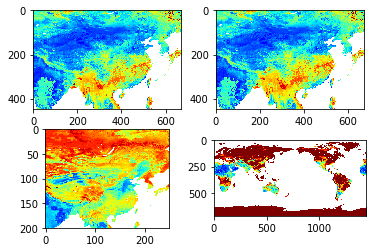

In [22]:
plt.subplot(2, 2, 1)
plt.imshow(smap_obs[1], vmin=0, vmax=0.5, cmap='jet')
plt.subplot(2, 2, 2)
plt.imshow(smap_obs[2], vmin=0, vmax=0.5, cmap='jet')
plt.subplot(2, 2, 3)
plt.imshow(gfs[0, 0, 100:300, 300:550], vmin=0, vmax=0.5, cmap='jet')
plt.subplot(2, 2, 4)
plt.imshow(gfs[0, 1], vmin=0, vmax=0.3, cmap='jet')

In [2]:
obs = np.load('/Users/lilu/Desktop/y_test_obs_1.npy')
pred = np.load('/Users/lilu/Desktop/y_test_pred_1.npy')
pred1 = np.load('/Users/lilu/Desktop/x_era5_valid.npy')


In [55]:
obs = np.load('/Users/lilu/Desktop/y_train_obs_1.npy')
pred = np.load('/Users/lilu/Desktop/y_train_pred_1.npy')
pred1 = np.load('/Users/lilu/Desktop/z_train_1.npy')

#pred1 = np.load('/Users/lilu/Desktop/7_convlstm_shixingjian.npy')

#x = np.load('/Users/lilu/Desktop/X_train_1.npy')

In [28]:
obs = obs[:]

In [15]:
x.shape

(1448, 7, 112, 112, 8)

In [3]:
pred.shape

(15, 14, 112, 112, 1)

In [19]:
r2_train = np.full((7, 224, 224), np.nan)
r2_valid = np.full((7, 224, 224), np.nan)
r2_test = np.full((7, 224, 224), np.nan)

r_train = np.full((7, 224, 224), np.nan)
r_test = np.full((7, 224, 224), np.nan)
r_valid = np.full((7, 224, 224), np.nan)

rmse_train = np.full((7, 224, 224), np.nan)
rmse_test = np.full((8, 224, 224), np.nan)
rmse_valid = np.full((7, 224, 224), np.nan)

for i in range(8):
    for j in range(112):
        for k in range(112):
            #r2_test[i,j,k] = r2_score(obs[:,i, j,k,0],pred[:,i,j,k,0])
            #r_test[i,j,k] = np.corrcoef(obs[:,i, j,k,0],pred[:,i,j,k,0])[0,1]
            rmse_test[i,j,k] = np.sqrt(mean_squared_error(obs[:, i+5,j,k,0],pred[:,i+5,j,k,0]))       

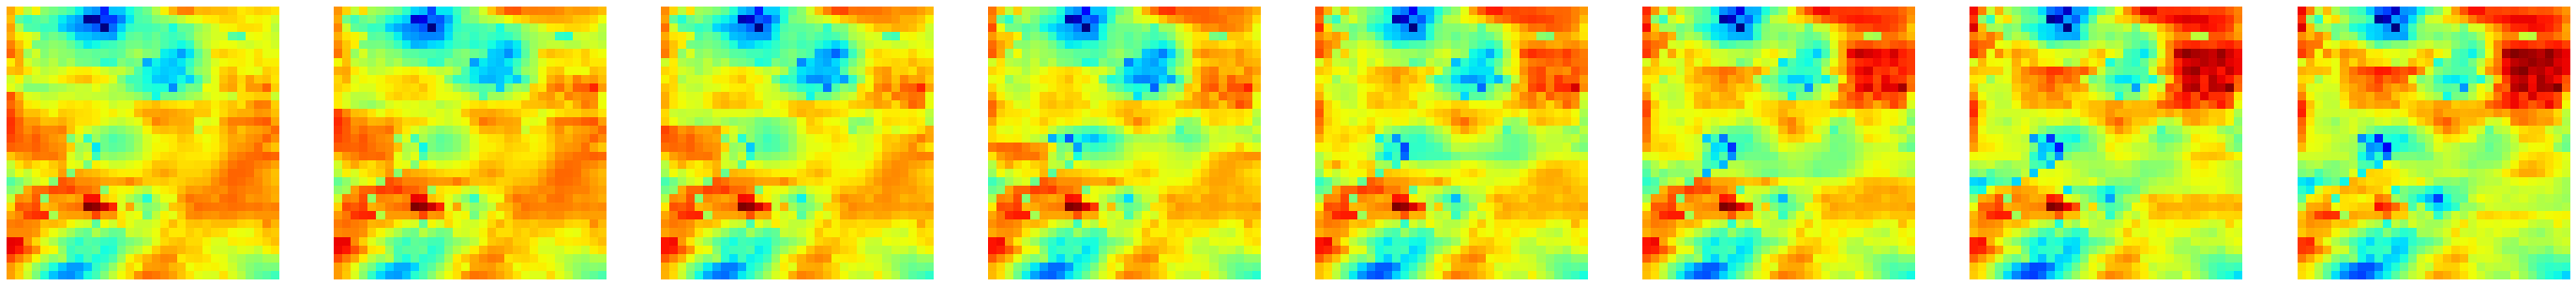

In [20]:
plt.figure(figsize=(49,7))

for i in range(8):
    plt.subplot(1,8, i+1)
    plt.imshow(rmse_test[i,:32,:32], cmap='jet')
    plt.axis('off')


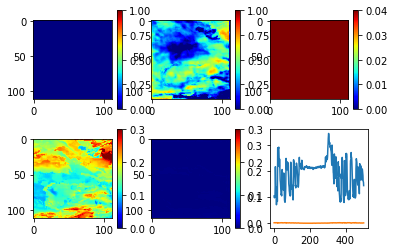

In [83]:
plt.subplot(2,3,1)
plt.imshow(r2_test[2,:112,:112],vmin=0, vmax=1, cmap='jet')
plt.colorbar()

plt.subplot(2,3,2)
plt.imshow(r_test[2, :112,:112],vmin=0, vmax=1, cmap='jet')
plt.colorbar()

plt.subplot(2,3,3)
plt.imshow(rmse_test[2, :112,:112],vmin=0, vmax=0.04, cmap='jet')
plt.colorbar()

plt.subplot(2,3,4)
plt.imshow(np.nanmean(obs[:, 0,:112,:112,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

plt.subplot(2,3,5)
plt.imshow(np.nanmean(pred[:, 0,:112,:112,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

plt.subplot(2,3,6)
plt.plot(obs[:, 0, 0, 0, 0])
plt.plot(pred[:, 0, 0, 0, 0])

In [5]:
np.nanmean(r_test[2,:112,:112])

0.7458016401093226

In [4]:
obs.shape

(501, 14, 112, 112, 1)

In [3]:
pred.shape

(501, 14, 112, 112, 1)

In [10]:
pred1.shape

(502, 7, 112, 112, 1)

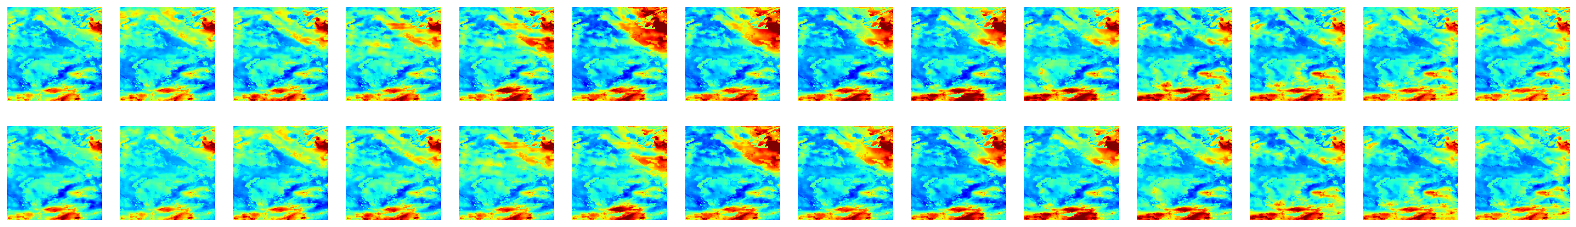

In [11]:
plt.figure(figsize=(28,4))

for i in range(14):
    plt.subplot(2,14,i+1)
    plt.imshow(obs[0, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    plt.axis('off')

    plt.subplot(2,14,i+15)
    plt.imshow(pred[0, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    plt.axis('off')


    #plt.subplot(3,14,i+29)
    #plt.imshow(pred1[0, i,:112,:112,0],vmin=0,vmax=0.3,cmap='jet')
    #plt.axis('off')
    #plt.colorbar()
    #plt.subplot(3,7,i+15)
    #plt.imshow(pred1[6, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    #plt.axis('off')

plt.savefig('/Users/lilu/Desktop/2.pdf')


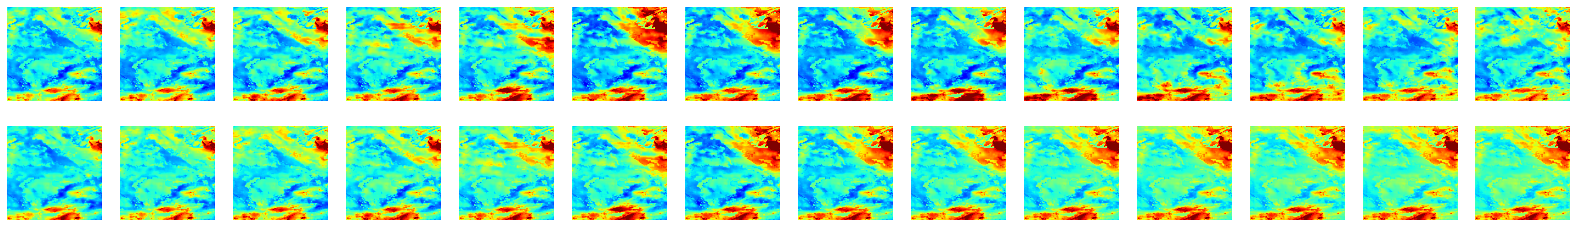

In [9]:
plt.figure(figsize=(28,4))

for i in range(14):
    plt.subplot(2,14,i+1)
    plt.imshow(obs[0, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    plt.axis('off')

    plt.subplot(2,14,i+15)
    plt.imshow(pred[0, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    plt.axis('off')


    #plt.subplot(3,14,i+29)
    #plt.imshow(pred1[0, i,:112,:112,0],vmin=0,vmax=0.3,cmap='jet')
    #plt.axis('off')
    #plt.colorbar()
    #plt.subplot(3,7,i+15)
    #plt.imshow(pred1[6, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    #plt.axis('off')

plt.savefig('/Users/lilu/Desktop/2.pdf')

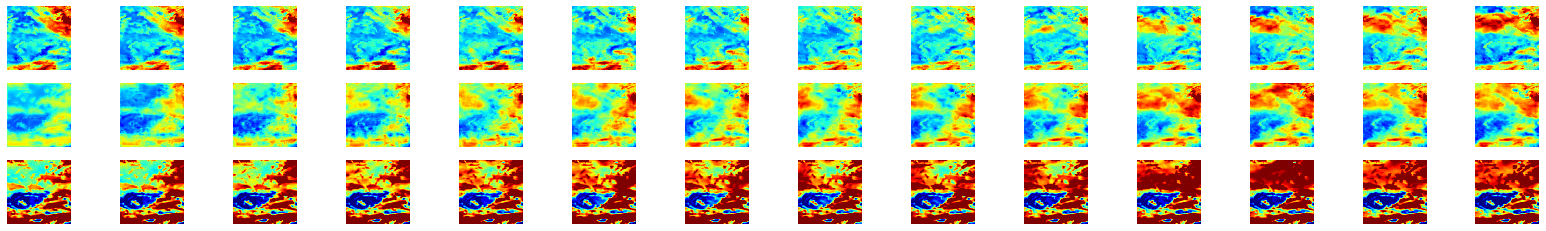

In [12]:
plt.figure(figsize=(28,4))

for i in range(14):
    plt.subplot(3,14,i+1)
    plt.imshow(obs[5, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    plt.axis('off')

    plt.subplot(3,14,i+15)
    plt.imshow(pred[5, i,:112,:112,0],vmin=0.05, vmax=0.35, cmap='jet')
    plt.axis('off')


    plt.subplot(3,14,i+29)
    plt.imshow(pred1[5, i,:112,:112,0],vmin=0.05,vmax=0.35,cmap='jet')
    plt.axis('off')
    #plt.colorbar()
    #plt.subplot(3,7,i+15)
    #plt.imshow(pred1[6, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    #plt.axis('off')

plt.savefig('/Users/lilu/Desktop/2.pdf')

In [9]:
pred1.shape

(352, 14, 112, 112, 1)

In [34]:
pred.shape

(495, 14, 112, 112, 1)

In [33]:
obs.shape

(495, 14, 112, 112, 1)

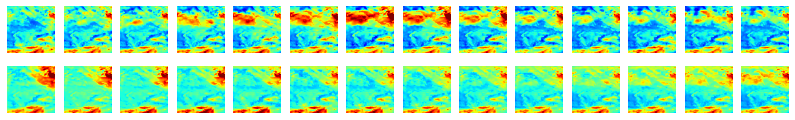

In [40]:
plt.figure(figsize=(14,2))

for i in range(14):
    plt.subplot(2,14,i+1)
    plt.imshow(obs[6, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    plt.axis('off')

    plt.subplot(2,14,i+15)
    plt.imshow(pred[6, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    plt.axis('off')


    #plt.subplot(3,14,i+29)
    #plt.imshow(pred1[5, i,:112,:112,0],vmin=0.05,vmax=0.35,cmap='jet')
    #plt.axis('off')
    #plt.colorbar()
    #plt.subplot(3,7,i+15)
    #plt.imshow(pred1[6, i,:112,:112,0],vmin=0, vmax=0.3, cmap='jet')
    #plt.axis('off')

plt.savefig('/Users/lilu/Desktop/2.pdf')